In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [153]:
import matplotlib
print(matplotlib.__version__)

3.4.3


In [2]:
Ndis_df=pd.read_csv('USdisaster.csv')
Ndis_df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,bb121323c9c29d3bef0c9a3f134bfd8b5ecff148,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025780
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025783
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,4fb19699fdbba1387ffa2263fcc4a4e37a1de6d6,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025777
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13T23:01:19Z,60c3b7a9a0ee349d7102577a
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,954449c15634fb45c8bea3ac975782793ccde050,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025774


In [3]:
Ndis_df.shape

(62771, 22)

In [4]:
Ndis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62771 entries, 0 to 62770
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     62771 non-null  object
 1   disaster_number             62771 non-null  int64 
 2   state                       62771 non-null  object
 3   declaration_type            62771 non-null  object
 4   declaration_date            62771 non-null  object
 5   fy_declared                 62771 non-null  int64 
 6   incident_type               62771 non-null  object
 7   declaration_title           62771 non-null  object
 8   ih_program_declared         62771 non-null  int64 
 9   ia_program_declared         62771 non-null  int64 
 10  pa_program_declared         62771 non-null  int64 
 11  hm_program_declared         62771 non-null  int64 
 12  incident_begin_date         62771 non-null  object
 13  incident_end_date           54433 non-null  ob

In [5]:
Ndis_df.describe()

,disaster_number,fy_declared,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,declaration_request_number
count,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000,62771.000000
mean,2540.282503,2003.958452,0.168470,0.273805,0.930828,0.426566,31711.800577,96348.959854,35295.169824
std,1394.657070,14.703548,0.374286,0.445914,0.253749,0.494582,16539.960239,14036.315551,35272.190599
min,1.000000,1953.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,3.000000
25%,1293.000000,1996.000000,0.000000,0.000000,1.000000,0.000000,20000.000000,99029.000000,8135.000000
50%,3033.000000,2006.000000,0.000000,0.000000,1.000000,0.000000,30037.000000,99073.000000,19106.000000
75%,3482.000000,2017.000000,0.000000,1.000000,1.000000,1.000000,46079.000000,99125.000000,74060.000000
max,5423.000000,2022.000000,1.000000,1.000000,1.000000,1.000000,78030.000000,99507.000000,99159.000000


In [6]:
Ndis_df.isnull().sum()

fema_declaration_string           0
disaster_number                   0
state                             0
declaration_type                  0
declaration_date                  0
fy_declared                       0
incident_type                     0
declaration_title                 0
ih_program_declared               0
ia_program_declared               0
pa_program_declared               0
hm_program_declared               0
incident_begin_date               0
incident_end_date              8338
disaster_closeout_date        15319
fips                              0
place_code                        0
designated_area                   0
declaration_request_number        0
hash                              0
last_refresh                      0
id                                0
dtype: int64

In [7]:
process_df=Ndis_df.select_dtypes(exclude=['datetime64','object'])
process_df


,disaster_number,fy_declared,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,fips,place_code,declaration_request_number
0,1,1953,0,1,1,1,13000,0,53013
1,2,1953,0,1,1,1,48000,0,53003
2,3,1953,0,1,1,1,22000,0,53005
3,4,1953,0,1,1,1,26000,0,53004
4,5,1953,0,1,1,1,30000,0,53006
...,...,...,...,...,...,...,...,...,...
62766,4637,2022,1,0,1,1,47079,99079,21130
62767,4637,2022,1,0,1,1,47165,99165,21130
62768,4637,2022,0,0,1,1,47039,99039,21130
62769,4637,2022,0,0,1,1,47045,99045,21130


In [8]:
for i in Ndis_df.select_dtypes(exclude=['float64']).columns:
    print(i,Ndis_df[i].nunique())

fema_declaration_string 4632
disaster_number 4632
state 59
declaration_type 3
declaration_date 3978
fy_declared 70
incident_type 23
declaration_title 2189
ih_program_declared 2
ia_program_declared 2
pa_program_declared 2
hm_program_declared 2
incident_begin_date 3458
incident_end_date 3272
disaster_closeout_date 1812
fips 3323
place_code 1302
designated_area 2952
declaration_request_number 4632
hash 62771
last_refresh 284
id 62771


## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

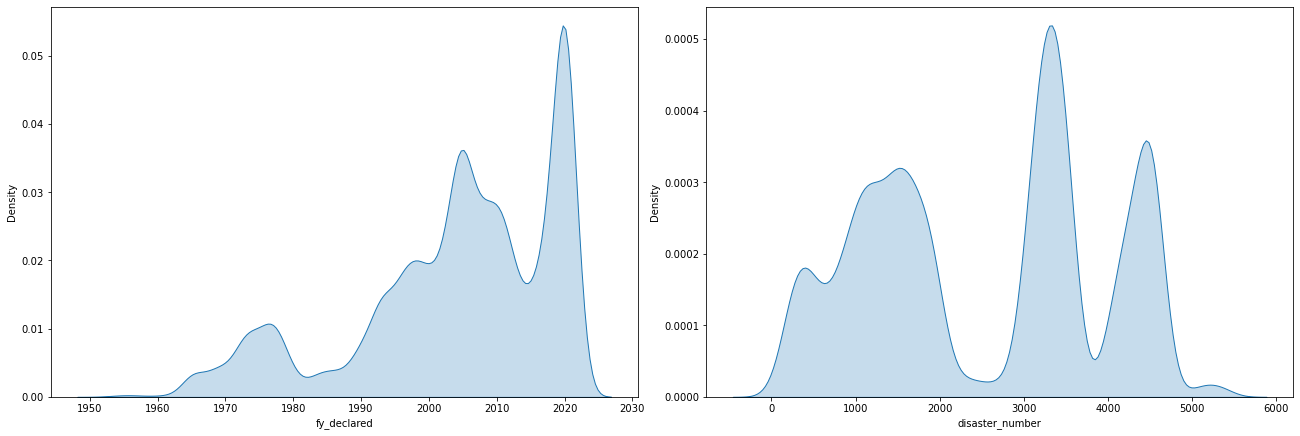

In [140]:
plt.figure(figsize=(18,6)) 
plt.subplot(121)
sns.kdeplot(data=Ndis_df, x="fy_declared",fill=True)
plt.xlabel("fy_declared")
plt.tight_layout(pad=0.5)

plt.subplot(122)
sns.kdeplot(data=Ndis_df, x="disaster_number",fill=True)
plt.xlabel("disaster_number")
plt.tight_layout(pad=0.5)


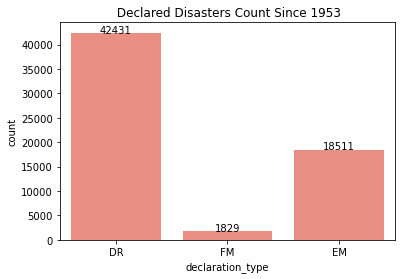

In [155]:
ax=sns.countplot(x = 'declaration_type',data = Ndis_df,color="salmon")
plt.title(" Declared Disasters Count Since 1953")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

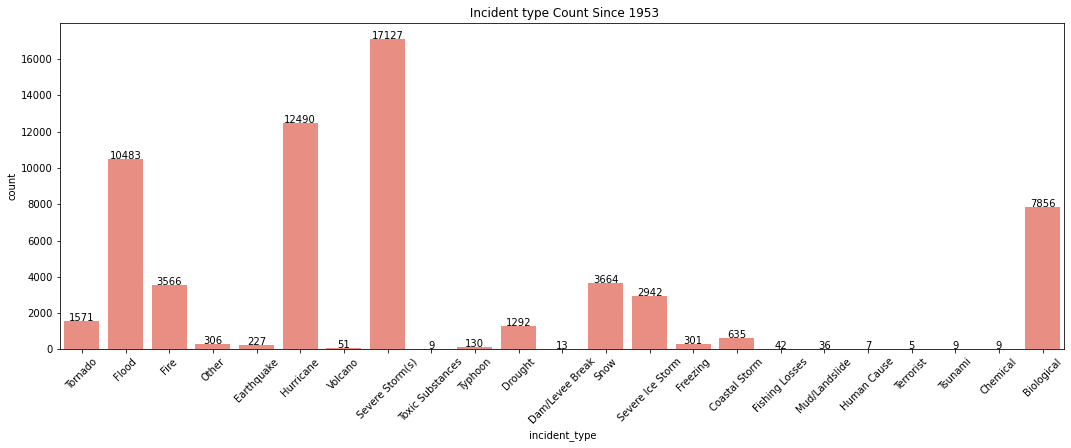

In [156]:
plt.figure(figsize=(18,6)) 
plt.xticks(rotation=45)
ax=sns.countplot(x = 'incident_type',data = Ndis_df,color="salmon")
plt.title(" Incident type Count Since 1953")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

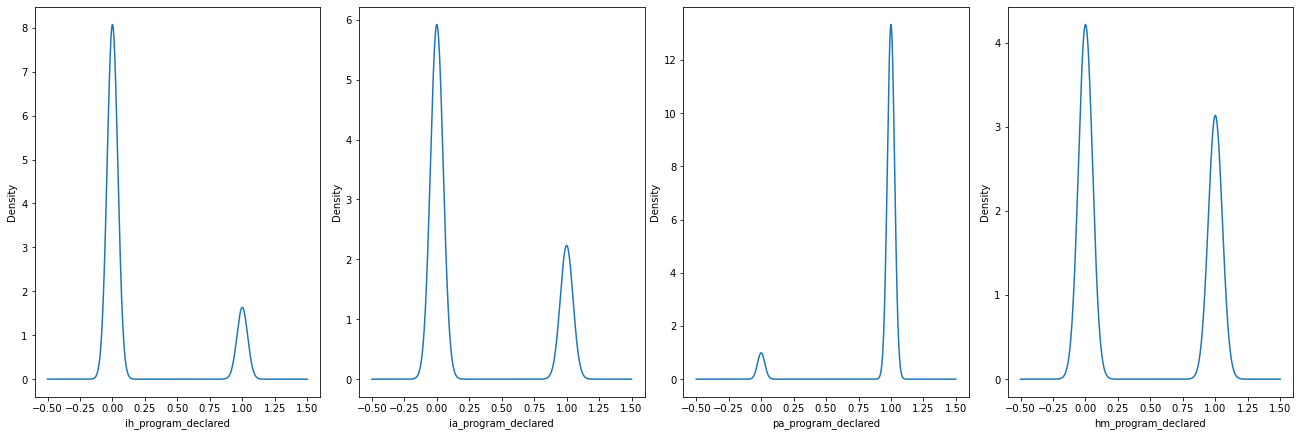

In [52]:
plt.subplot(141)
Ndis_df['ih_program_declared'].plot.kde(figsize=(18,6))
plt.xlabel("ih_program_declared")
plt.tight_layout(pad=0.5)

plt.subplot(142)
Ndis_df['ia_program_declared'].plot.kde()
plt.xlabel("ia_program_declared")
plt.tight_layout(pad=0.5)

plt.subplot(143)
Ndis_df['pa_program_declared'].plot.kde()
plt.xlabel("pa_program_declared")
plt.tight_layout(pad=0.5)

plt.subplot(144)
Ndis_df['hm_program_declared'].plot.kde()
plt.xlabel("hm_program_declared")
plt.tight_layout(pad=0.5)

### Bivariate Analysis

<AxesSubplot:xlabel='incident_type', ylabel='fy_declared'>

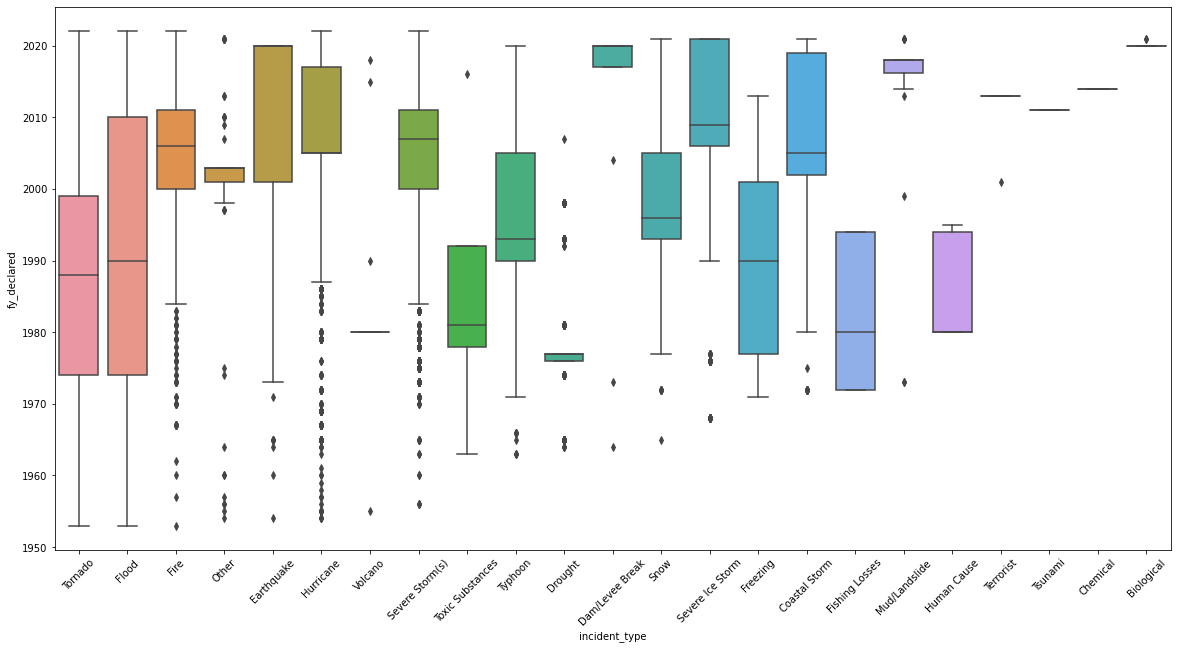

In [123]:
# Perform Bivariate Analysis using boxplot
plt.figure(figsize=(20,15))
plt.xticks(rotation=45)
sns.boxplot(x= "incident_type",y = "fy_declared", data=Ndis_df)

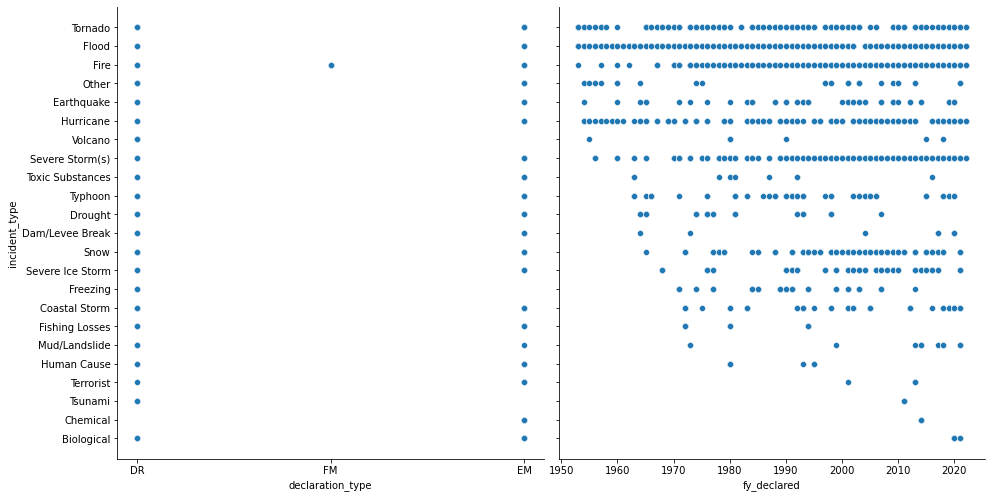

In [142]:
sns.pairplot(
    Ndis_df,
    x_vars=[ 'declaration_type','fy_declared'],
    y_vars=['incident_type'],height=7  
)

<AxesSubplot:xlabel='hm_program_declared', ylabel='disaster_number'>

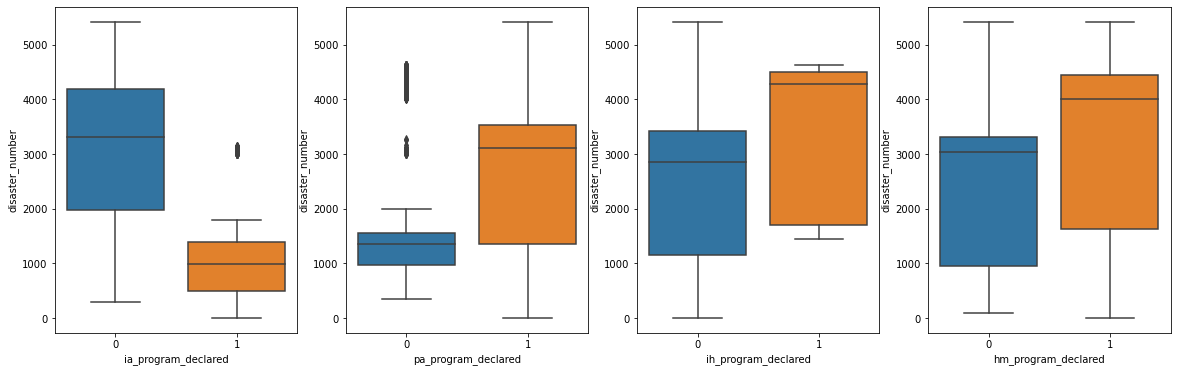

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,6)) # create 1x4 array of subplots
sns.boxplot(y = "disaster_number", x = "ia_program_declared", data=Ndis_df, ax=axes[0]) # add boxplot to 1st subplot
sns.boxplot(y = "disaster_number", x = "pa_program_declared", data=Ndis_df, ax=axes[1])
sns.boxplot(y = "disaster_number", x = "ih_program_declared", data=Ndis_df, ax=axes[2]) 
sns.boxplot(y = "disaster_number", x = "hm_program_declared", data=Ndis_df, ax=axes[3])

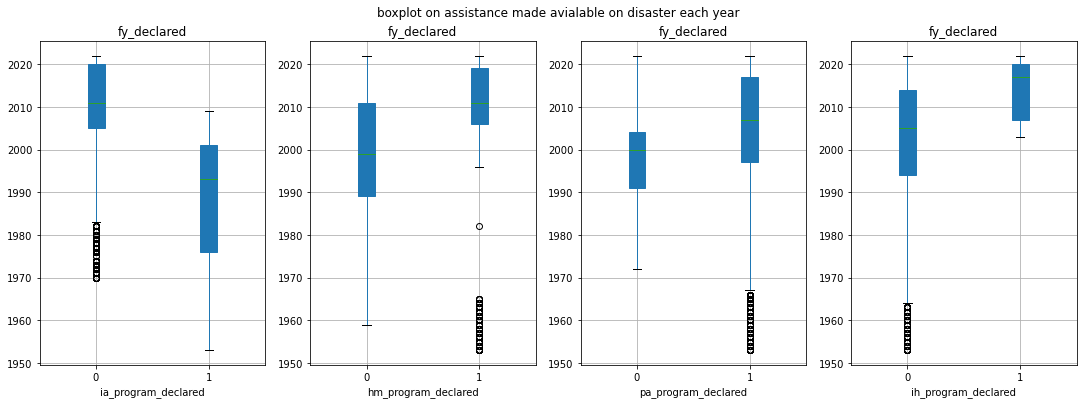

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(18,6)) # create 1x4 array of subplots
Ndis_df.boxplot(column='fy_declared',by='ia_program_declared', ax=axes[0],patch_artist=True) # add boxplot to 1st subplot
Ndis_df.boxplot(column='fy_declared', by='hm_program_declared', ax=axes[1],patch_artist=True) # add boxplot to 2nd subplot
Ndis_df.boxplot(column='fy_declared', by='pa_program_declared', ax=axes[2],patch_artist=True)
Ndis_df.boxplot(column='fy_declared', by='ih_program_declared', ax=axes[3],patch_artist=True)
fig.suptitle('boxplot on assistance made avialable on disaster each year')

plt.show()